In [1]:
import pandas as pd

df = pd.read_csv("/workspaces/Email-validation/Email-Data/1@abn.csv")
df.head()

,S.No,email,first_name,last_name,phone,clean_status
0,1,abhi@custinc.com,NaN,NaN,NaN,VALID
1,2,abilash@advantageitinc.com,NaN,NaN,NaN,VALID
2,3,alesia@sunraycorp.com,NaN,NaN,NaN,VALID
3,4,anil7@pantarsolutions.net,NaN,NaN,NaN,VALID
4,5,anoop@palnar.com,NaN,NaN,NaN,VALID


In [1]:
import pandas as pd
import re
import is_disposable_email
from email_validator import validate_email, EmailNotValidError, EmailSyntaxError
import logging
from tqdm import tqdm
from sklearn.metrics import classification_report

In [5]:
import pandas as pd
import re
import is_disposable_email
from email_validator import validate_email, EmailNotValidError, EmailSyntaxError
import logging
from tqdm import tqdm
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to check the format of an email
def check_email(s):
    pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b'
    if re.match(pattern, s):
        return "VALID"
    else:
        return "INVALID"

# Function to check if an email is disposable
def disposable_email(email):
    result = is_disposable_email.check(email)
    return "Yes" if result else "No"

# Function to validate the format and deliverability of an email
def validate_email_format(email):
    try:
        email_info = validate_email(email, check_deliverability=True)
        return "VALID", "-"
    except EmailSyntaxError as e_syntax:
        return "INVALID", str(e_syntax)
    except EmailNotValidError as e_not_valid:
        return "INVALID", str(e_not_valid)
    except Exception as e:
        return "ERROR", str(e)

import pandas as pd

df = pd.read_csv("/workspaces/Email-validation/Email-Data/1@abn.csv")

# Add new columns
df['validate_email'] = ''
df['domain_address'] = ''
df['disposable_email'] = ''
df['deliverable_email'] = ''
df['reason'] = ''

# Validate emails and populate new columns
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Validating emails"):
    email = row['email']
    df.at[index, 'validate_email'] = check_email(email)
    df.at[index, 'domain_address'] = email.split('@')[1] if '@' in email else ''
    df.at[index, 'disposable_email'] = disposable_email(email)
    deliverable_email, reason = validate_email_format(email)
    df.at[index, 'deliverable_email'] = deliverable_email
    df.at[index, 'reason'] = reason

# Generate classification report
y_true = df['clean_status']
y_pred = df['deliverable_email']
report = classification_report(y_true, y_pred, target_names=['INVALID', 'VALID'])

# Output results
print("Validation Results:")
print(df)
print("\nClassification Report:")
print(report)

# Save results to CSV
# output_file = 'validated_emails.csv'
# df.to_csv(output_file, index=False)
#logging.info(f"Results saved to {output_file}")


Validating emails: 100%|██████████| 1723/1723 [07:02<00:00,  4.08it/s]

Validation Results:
      S.No                       email  first_name  last_name  phone  \
0        1            abhi@custinc.com         NaN        NaN    NaN   
1        2  abilash@advantageitinc.com         NaN        NaN    NaN   
2        3       alesia@sunraycorp.com         NaN        NaN    NaN   
3        4   anil7@pantarsolutions.net         NaN        NaN    NaN   
4        5            anoop@palnar.com         NaN        NaN    NaN   
...    ...                         ...         ...        ...    ...   
1718  1719        yogesh@noblesoft.com         NaN        NaN    NaN   
1719  1720       kathy@mhrinfotech.com         NaN        NaN    NaN   
1720  1721            nick@eqalabs.com         NaN        NaN    NaN   
1721  1722     anthony@centillionz.com         NaN        NaN    NaN   
1722  1723    vara.prasad@itsyntax.com         NaN        NaN    NaN   

     clean_status validate_email       domain_address disposable_email  \
0           VALID          VALID         

In [11]:
report = classification_report(y_true, y_pred, target_names=['INVALID', 'VALID'], output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
INVALID,0.892857,0.047893,0.090909,522.000000
VALID,0.706785,0.997502,0.827348,1201.000000
accuracy,0.709808,0.709808,0.709808,0.709808
macro avg,0.799821,0.522697,0.459129,1723.000000
weighted avg,0.763157,0.709808,0.604237,1723.000000


2024-07-16 15:13:06,289 - INFO - generated new fontManager


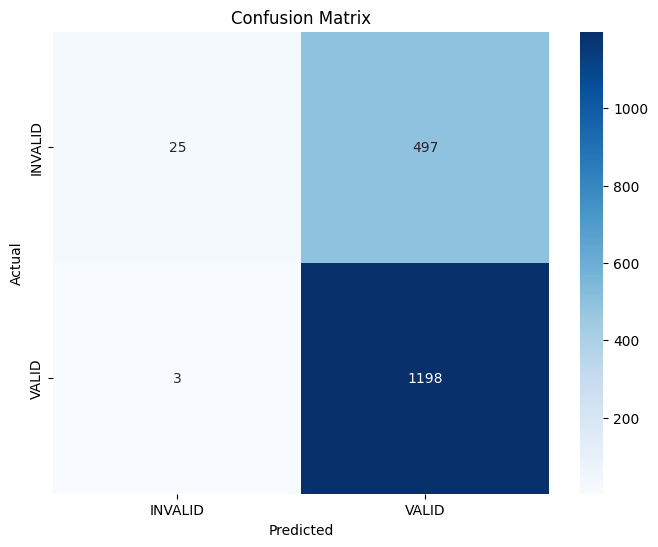

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['INVALID', 'VALID'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['INVALID', 'VALID'], yticklabels=['INVALID', 'VALID'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Validating emails:   0%|          | 0/1723 [00:00<?, ?it/s]

Processing results: 100%|██████████| 1723/1723 [00:39<00:00, 43.79it/s]


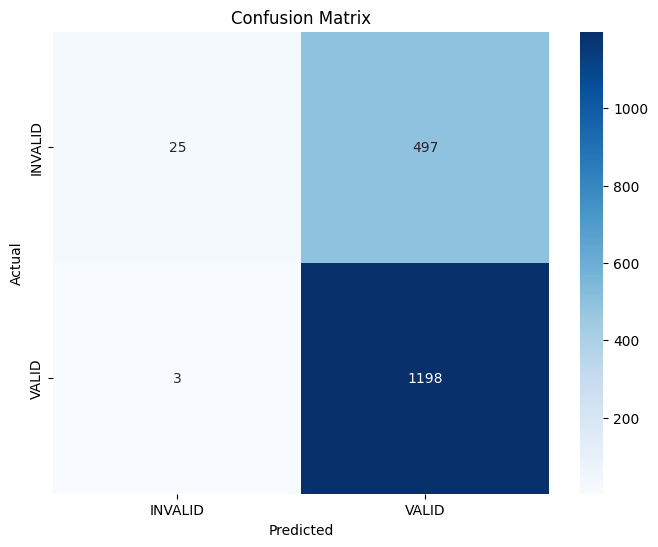

Validation Results:
      S.No                       email  first_name  last_name  phone  \
0        1            abhi@custinc.com         NaN        NaN    NaN   
1        2  abilash@advantageitinc.com         NaN        NaN    NaN   
2        3       alesia@sunraycorp.com         NaN        NaN    NaN   
3        4   anil7@pantarsolutions.net         NaN        NaN    NaN   
4        5            anoop@palnar.com         NaN        NaN    NaN   
...    ...                         ...         ...        ...    ...   
1718  1719        yogesh@noblesoft.com         NaN        NaN    NaN   
1719  1720       kathy@mhrinfotech.com         NaN        NaN    NaN   
1720  1721            nick@eqalabs.com         NaN        NaN    NaN   
1721  1722     anthony@centillionz.com         NaN        NaN    NaN   
1722  1723    vara.prasad@itsyntax.com         NaN        NaN    NaN   

     clean_status validate_email       domain_address disposable_email  \
0           VALID          VALID         

In [16]:
import pandas as pd
import re
import is_disposable_email
from email_validator import validate_email, EmailNotValidError, EmailSyntaxError
import logging
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from concurrent.futures import ThreadPoolExecutor
import seaborn as sns
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to check the format of an email
def check_email(s):
    pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b'
    if re.match(pattern, s):
        return "VALID"
    else:
        return "INVALID"

# Function to check if an email is disposable
def disposable_email(email):
    result = is_disposable_email.check(email)
    return "Yes" if result else "No"

# Function to validate the format and deliverability of an email
def validate_email_format(email):
    try:
        email_info = validate_email(email, check_deliverability=True)
        return "VALID", "-"
    except EmailSyntaxError as e_syntax:
        return "INVALID", str(e_syntax)
    except EmailNotValidError as e_not_valid:
        return "INVALID", str(e_not_valid)
    except Exception as e:
        return "ERROR", str(e)

# Function to process a single email
def process_email(index, row):
    email = row['email']
    validate_email_result = check_email(email)
    domain_address = email.split('@')[1] if '@' in email else ''
    disposable_email_result = disposable_email(email)
    deliverable_email, reason = validate_email_format(email)
    return index, validate_email_result, domain_address, disposable_email_result, deliverable_email, reason

# Load dataset
from glob import glob
df_list = list()
for path in glob.glob(f"/workspaces/Email-validation/Email-Data/*.csv"):
    df = pd.read_csv("/workspaces/Email-validation/Email-Data/1@abn.csv")

    # Add new columns
    df['validate_email'] = ''
    df['domain_address'] = ''
    df['disposable_email'] = ''
    df['deliverable_email'] = ''
    df['reason'] = ''

    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = []
        for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Validating emails"):
            futures.append(executor.submit(process_email, index, row))

        for future in tqdm(futures, desc="Processing results"):
            index, validate_email_result, domain_address, disposable_email_result, deliverable_email, reason = future.result()
            df.at[index, 'validate_email'] = validate_email_result
            df.at[index, 'domain_address'] = domain_address
            df.at[index, 'disposable_email'] = disposable_email_result
            df.at[index, 'deliverable_email'] = deliverable_email
            df.at[index, 'reason'] = reason

    # Generate classification report
    y_true = df['clean_status']
    y_pred = df['deliverable_email']
    report = classification_report(y_true, y_pred, target_names=['INVALID', 'VALID'], output_dict=True)

    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=['INVALID', 'VALID'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['INVALID', 'VALID'], yticklabels=['INVALID', 'VALID'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Output results
    print("Validation Results:")
    print(df)
    print("\nClassification Report:")
    print(report_df)
    df_list.append(df)

single_df = pd.concat(df_list, ignore_index=True)
single_df.to_csv("final_output.csv", index=False)
# # Save results to CSV
# output_file = 'validated_emails.csv'
# df.to_csv(output_file, index=False)
# logging.info(f"Results saved to {output_file}")

# # Save the classification report to CSV
# report_output_file = 'classification_report.csv'
# report_df.to_csv(report_output_file, index=True)
# logging.info(f"Classification report saved to {report_output_file}")

# # Save the confusion matrix to CSV
# conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual_INVALID', 'Actual_VALID'], columns=['Predicted_INVALID', 'Predicted_VALID'])
# conf_matrix_output_file = 'confusion_matrix.csv'
# conf_matrix_df.to_csv(conf_matrix_output_file)
# logging.info(f"Confusion matrix saved to {conf_matrix_output_file}")
